<a href="https://colab.research.google.com/github/sabiqsabry/bawt/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BAWT (behavioural analysis via WhatsApp Text)**

People Behaviour via Chat Analysis Model using NLP

a people behavior via chat analysis model is a tool that is used to analyze and understand the behavior of individuals through the use of chat data. This can include analyzing the language and communication styles of individuals, as well as their interactions with others in a chat environment. The model can be used to identify patterns and trends in behavior, and to make predictions about how individuals may behave in the future. It can also be used to identify potential problems or issues that may arise within a group or organization, and to help design interventions or strategies to address these issues. Overall, a people behavior via chat analysis model can be a useful tool for understanding and managing human behavior in chat environments.

this was built for the module I am partaking in and presenting this as my final year project.

here are my details:

> NAME: Mohammad Sabiq Mohammad Sabry

> UOW_ID: 19219495

#Importing Libraries and Necessary Python Packages

The SoAn library was utilized to gather requirements through social analysis. WhatsApp messages were analyzed by extracting data using the SoAn library, which offered various analytical methods such as word frequency, word clouds, TF-IDF, and sentiment analysis. The library requires the .txt file to be in a specific format for analysis, and the helper function "import_data" is used to import the data and "preprocess_data" prepares it for analysis. After preprocessing, the data will have columns such as "Message_Raw" (raw message), "Message_Clean" (message without user and date), and "Message_Only_Text" (lowercased text with non-alphanumeric characters removed).

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis')  # Needed to import package in parent dir, remove this if you pip installed the package
import warnings
warnings.filterwarnings("ignore")
from soan.whatsapp import helper      # Helper to prepare the data
from soan.whatsapp import general     # General statistics
from soan.whatsapp import tf_idf      # To calculate TF-IDF
!pip install emoji==0.6.0
from soan.whatsapp import emoji       # To analyze emoji use
from soan.whatsapp import topic       # Topic modelling and summarization
from soan.whatsapp import sentiment   # Sentiment Analysis
from soan.whatsapp import wordcloud   # Create Word Clouds

from soan.colors   import colors      # Frequent Color Visualization

!pip install matplotlib==3.2.1
!pip install seaborn==0.10.1
!pip install Pillow==7.2.0
!pip install scipy==1.5.2
!pip install numpy==1.19.1
!pip install pandas==1.1.1
!pip install regex==2020.7.14
!pip install palettable==3.3.0
!pip install requests==2.22.0
!pip install scikit_learn==0.23.2
!pip install wordcloud==1.8.0
!pip install nltk==3.5
!pip install vaderSentiment==3.3.2

%matplotlib inline

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

In [ ]:
df = helper.import_data('/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/chat/User 9/WhatsApp Chat with Sabiq UK.txt')
df = helper.preprocess_data(df)

# Change labels for anonymization - Leave this at False
if False:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['User', 'Me'])}
    df.User = df.User.map(user_labels)

In [ ]:
general.print_users(df)

#############
##  Users  ##
#############

Sabiq UK
Nafeel


In [ ]:
user = "User"
language = "English"

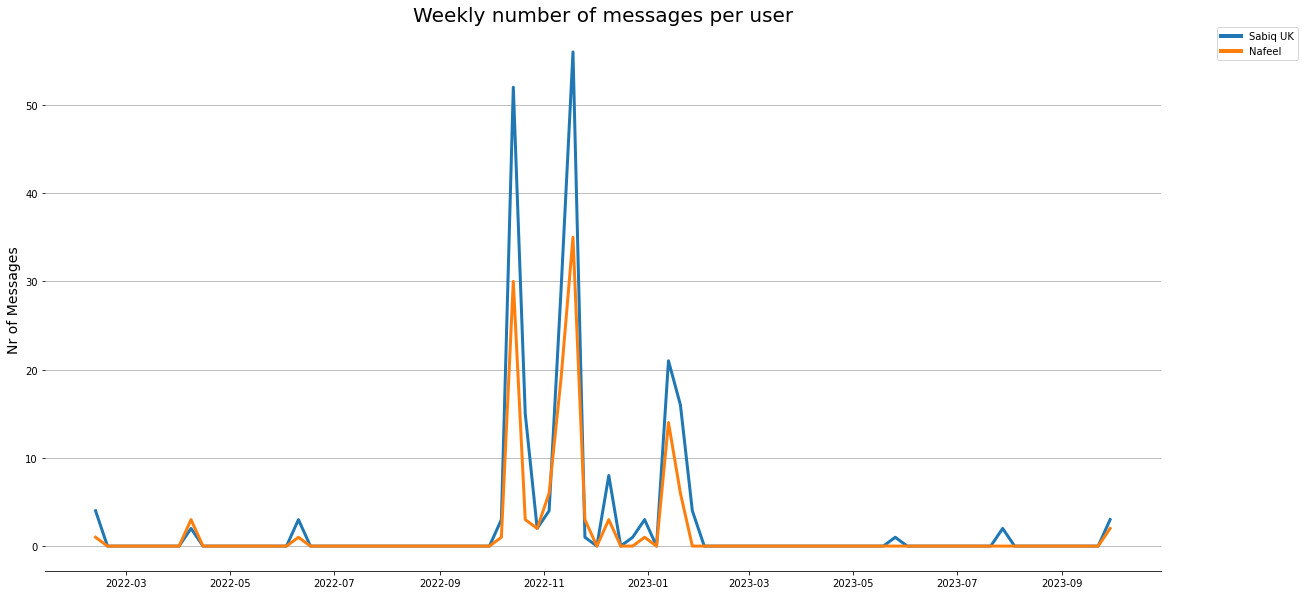

In [ ]:
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

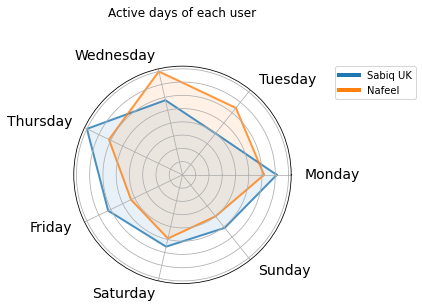

In [ ]:
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

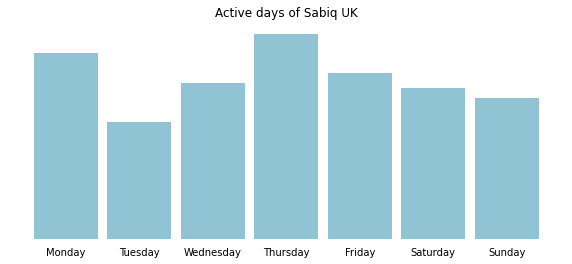

In [ ]:
general.plot_active_days(df, savefig=False, dpi=100, user='Sabiq UK')

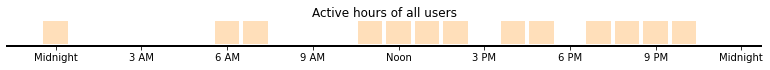

In [ ]:
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

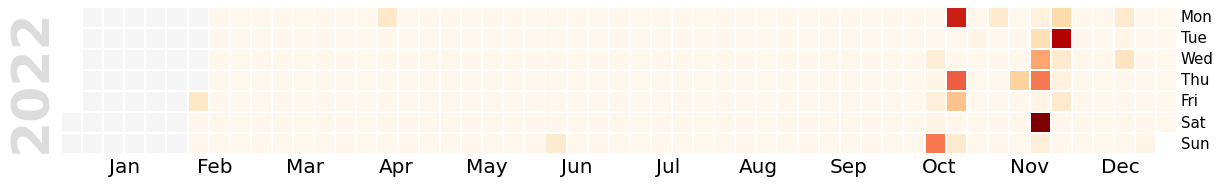

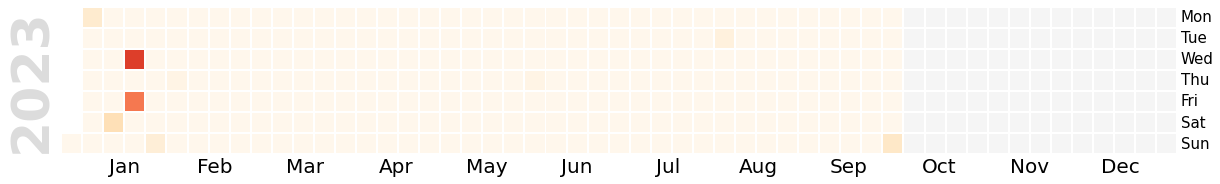

In [ ]:
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

In [ ]:
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Nafeel:                       65.57
Sabiq UK:                     36.25

##############################
##  Nr. Initiated Messages  ##
##############################

Sabiq UK:                     3		(1.3%  of all messages)
Nafeel:                       5		(3.85% of all messages)


In [ ]:
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language='english', column="Word")

In [ ]:
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

In [ ]:
tf_idf.print_users(df)

#############
##  Users  ##
#############

Sabiq UK
Nafeel


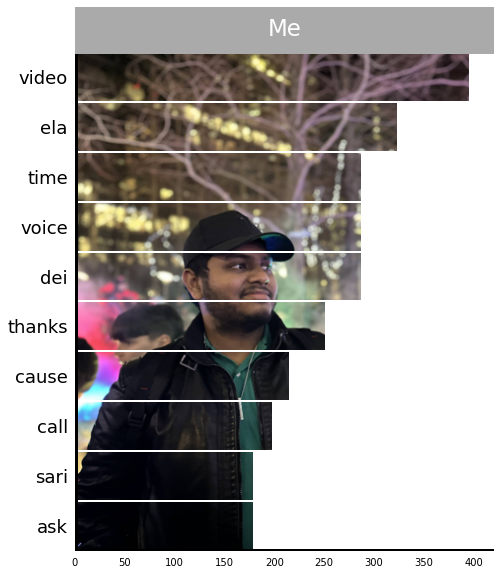

In [ ]:
tf_idf.plot_unique_words(unique_words, 
                         user='Sabiq UK', 
                         image_path='/content/drive/MyDrive/Colab Notebooks/bawt - chat behaviour analysis/images/IMG_6435.jpg', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Me", 
                         title_color="white", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

In [ ]:
# https://github.com/pandas-dev/pandas/issues/17892
temp = df[['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text']].copy()
temp = emoji.prepare_data(temp)

# Count all emojis
counts = emoji.count_emojis(temp, non_unicode=True)

# Get unique emojis
list_of_words = [word for user in counts for word in counts[user]]
unique_emoji = emoji.get_unique_emojis(temp, counts, list_of_words)
del temp

In [ ]:
emoji.print_stats(unique_emoji, counts)

#############################
### Unique Emoji (TF-IDF) ###
#############################

Sabiq UK
❤ 3.4025974025974017
😭 3.4025974025974017
😂 2.9300144300144306

Nafeel
🤣 5.877862595419849
🙏🏼 5.290076335877861
😫 3.526717557251909

#########################
### Most Common Emoji ###
#########################

Sabiq UK
😂 30
❤ 5
😭 5

Nafeel
🤣 9
😂 5
💀 3



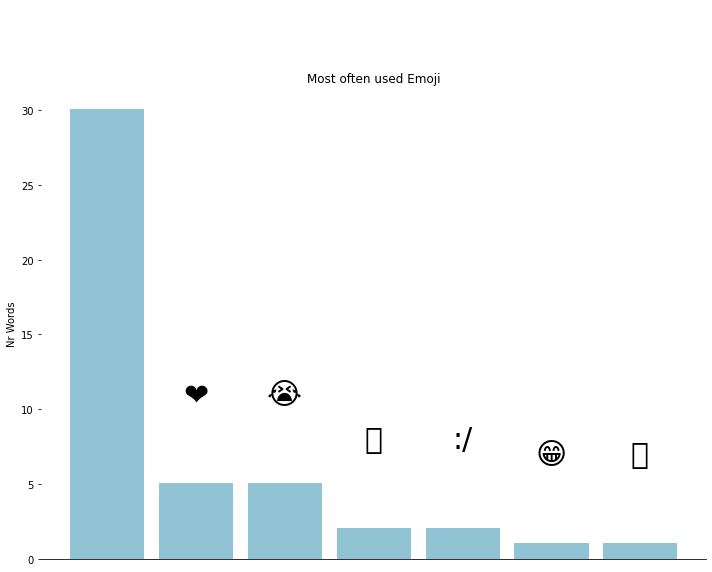

In [ ]:
emoji.plot_counts(counts, user = "Sabiq UK")

In [ ]:
topic.topics(df, model='lda', language="english")

################
### Sabiq UK ###
################


Topics in lda model:
Topic #0: ade cause take want brother know lemme
Topic #1: call missed video ela voice group atheek
Topic #2: go like send dont still favor yes
Topic #3: thanks bro podu eh go good anupu
Topic #4: dei shape time da sari put got

##############
### Nafeel ###
##############


Topics in lda model:
Topic #0: ill sarri da send dat wt ah
Topic #1: since dafuq eh later tmrw go call
Topic #2: cant naa da fr ennah date tell
Topic #3: ade im months hve la number spotify
Topic #4: broke ya bruh told rs go said



In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df['Sentiment'] = df.apply(lambda row: analyser.polarity_scores(row.Message_Clean)["compound"], 1)

In [ ]:
sentiment.print_avg_sentiment(df)

			#######################
			## Average Sentiment ##
			#######################
Sabiq UK:                     		0.069
Nafeel:                       		0.033





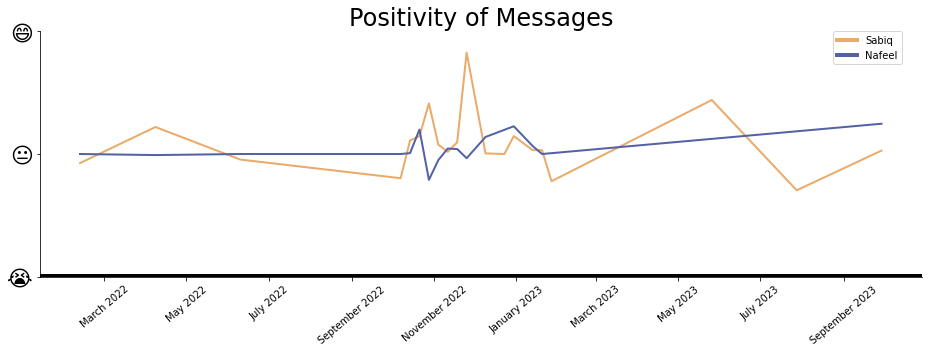

In [ ]:
sentiment.plot_sentiment(df, colors=['#EAAA69','#5361A5'], savefig=False)

In [ ]:
counts = tf_idf.count_words_per_user(df,sentence_column="Message_Only_Text",user_column="User")
counts = tf_idf.remove_stopwords(counts, language="english", column="Word")
words = counts[["Word", "Sabiq UK"]].set_index('Word').to_dict()["Sabiq UK"]

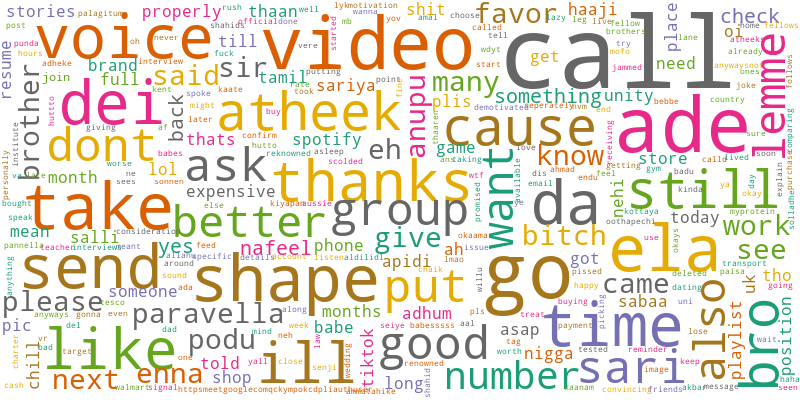

In [ ]:
wordcloud.create_wordcloud(words,random_state=42,
                           max_words=1000, max_font_size=50, scale=2, 
                           normalize_plurals=False, relative_scaling = 0.5)